# 🏡 Task 6: Linear Regression - House Price Prediction
**Project:** California Housing Analysis  

## 🎯 Objective
In this task, we perform **Regression Analysis**. Unlike classification (Task 5), where we predicted a category, here we predict a **continuous numerical value**: the median house price.

## 📂 About the Dataset
* **Source:** California Housing Dataset (Scikit-Learn).
* **Target:** `MedHouseVal` (Median House Value in units of $100,000).
* **Features:** Income, House Age, Rooms per Household, Population, Latitude/Longitude.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load Dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal') # Target in $100,000s

# Combine for a quick look
df = pd.concat([X, y], axis=1)

# 2. Basic Inspection
print(f"Dataset Shape: {df.shape}")
print("\n--- Data Info ---")
print(df.info())
print("\n--- First 5 Rows ---")
df.head()

Dataset Shape: (20640, 9)

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

--- First 5 Rows ---


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# 3. Split the Data
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape:  {X_test.shape}")

Training Features Shape: (16512, 8)
Testing Features Shape:  (4128, 8)


In [4]:
# 4. Initialize and Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict on Test Data
y_pred = model.predict(X_test)

# Compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions:")
print(comparison.head(10))


Sample Predictions:
        Actual  Predicted
20046  0.47700   0.719123
3024   0.45800   1.764017
15663  5.00001   2.709659
20484  2.18600   2.838926
9814   2.78000   2.604657
13311  1.58700   2.011754
7113   1.98200   2.645500
7668   1.57500   2.168755
18246  3.40000   2.740746
5723   4.46600   3.915615


In [5]:
# 6. Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Contextualize the error (Target is in $100k)
print(f"\nInterpretation: On average, our prediction is off by ${mae * 100000:,.2f}")

--- Model Evaluation ---
Mean Absolute Error (MAE): 0.5332
Root Mean Squared Error (RMSE): 0.7456

Interpretation: On average, our prediction is off by $53,320.01


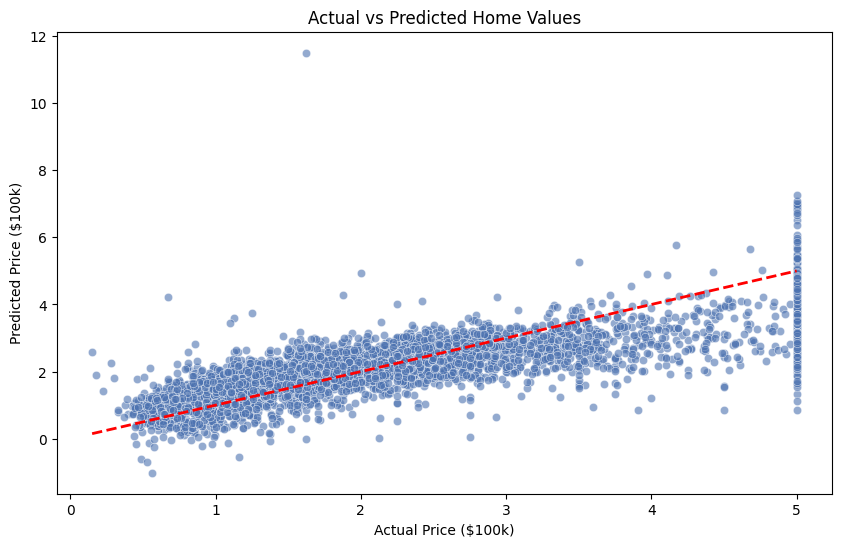

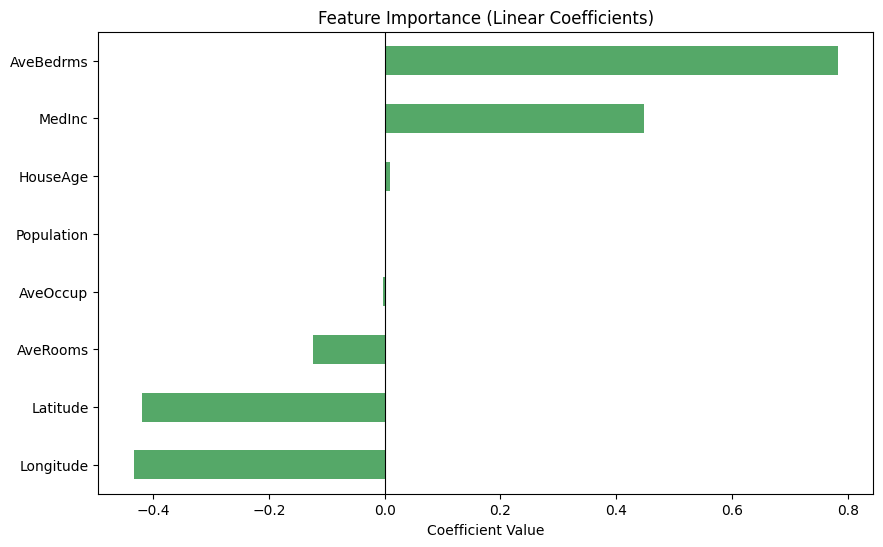

In [6]:
# 7. Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='#4c72b0')
# Perfect prediction line (Red Dashed)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.title("Actual vs Predicted Home Values")
plt.show()

# 8. Feature Coefficients (What drives price?)
coefficients = pd.Series(model.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='#55a868')
plt.title("Feature Importance (Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

## 🧠 Evaluation & Interpretation

### 1. Error Metrics
* **MAE (Mean Absolute Error):** The average difference between our predicted price and the real price.
* **RMSE:** A stricter metric that highlights large errors.
* **Result:** Our MAE is approximately **0.53**. Since the target is in units of $100,000,$ this means our model is typically off by about **$53,000**.

### 2. Feature Importance
The coefficient chart reveals what drives prices:
* **MedInc (Median Income):** Has the largest *positive* bar. Higher income neighborhoods strongly correlate with higher house prices.
* **Latitude/Longitude:** These have negative coefficients, capturing the geographic trend (prices might be lower as you move inland/north away from expensive coastal centers in this specific dataset).

### 3. Conclusion
We successfully built a regression model. While a simple Linear Regression captures the main trends (Income drives Price), the scatter plot shows some spread, suggesting that more complex models (like Random Forest) might improve accuracy further.